# Libs and Documentation 

In [1]:
import pandas as pd 
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

[Documentation](https://archive-beta.ics.uci.edu/ml/datasets/default+of+credit+card+clients#Descriptive)



+ ***LIMIT_BAL Amount of the given credit (NT dollar):***: it includes both the individual consumer credit and his/her family (supplementary) credit.

+ ***SEX: Gender***: (1 = male; 2 = female).

+ ***EDUCATION: Education***:(1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).

+ ***MARRIAGE Marital status***: (1 = married; 2 = single; 3 = divorce; 0=others).

+ ***AGE: Age***: (year).

+ ***PAY_0 - PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:***: PAY_0 = the repayment status in September, 2005; PAY_3 = the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005. ***The measurement scale for the repayment status is:***-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

+ ***BILL_AMT1-BILL_AMT6 Amount of bill statement (NT dollar).*** BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005.

+ ***PAY_AMT1-PAY_AMT2: Amount of previous payment (NT dollar).***: PAY_AMT1 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;PAY_AMT2 = amount paid in April, 2005.

+ ***default payment next month (Y)***: client's behavior; Y=0 then not default, Y=1 then default"

# EDA

## First look at the data

In [3]:
# Loading de DataFrame

default_credit_card = pd.read_excel('default of credit card clients.xls', skiprows =1)
pd.set_option('display.max_columns', 25)
default_credit_card.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [5]:
# Taking a quick look at the features

display(default_credit_card.describe().T)
default_credit_card.info()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

***We Don't have missing data and the data types looks right. But some features draw attention:***
+ EDUCATION -- We have 6 categories, but 75% of values are included in only tree categories.
+ MARRIAGE -- Something similar happens, categories 0 and 3 may not have much values
+ Age -- it seems that age is concentrated in young people, maybe this feature is skewed
+ LIMIT_BAL -- The max value (1000000.0) is 4x bigger then 75% of values, we may have to deal with some outliers. 

***We also noted that the columns name can be improved. First, lets standardize the names in snake_case, then, we can rename PAY_0 to PAY_1, just to keep the same notation through features. We don't need the column 'id' either*** 


In [25]:
# Renaming Columns

default_credit_card_2 = default_credit_card.copy()

for col in default_credit_card_2.columns:
    default_credit_card_2.rename(columns = {col:col.lower().strip().replace(' ','_')},inplace = True)

default_credit_card_2.rename(columns = {'pay_0':'pay_1'}, inplace = True)
default_credit_card_2.drop('id',axis = 1,inplace = True)
default_credit_card_2.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_payment_next_month'],
      dtype='object')

***Before start exploring the features, lets take a look at default_payment_next_month, the variable that we want to predict!***

In [26]:
default_count = default_credit_card_2.default_payment_next_month.value_counts()

default_count

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

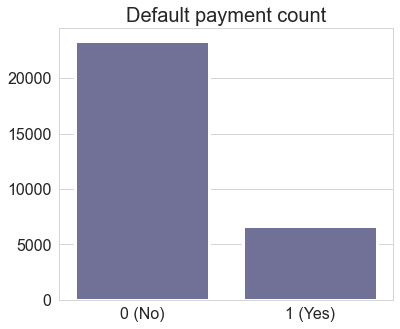

In [27]:
sns.set_style('whitegrid')

fig, ax1 = plt.subplots(figsize=(6,5))

sns.barplot(y=[default_count[0],default_count[1] ],
            x=['0 (No)','1 (Yes)'],
            color ='#6a6a9e',lw =3, ax = ax1)


ax1.set_title("Default payment count",fontsize = 20)
ax1.tick_params(labelsize=16)
plt.show()

***We have imbalanced data! We will have to deal with this to train the model. But for now, lets analyze the others features, choose what makes sense to keep, what makes sense to transform and what to delete***

## Age

***As noted before, Age may be skewed. So lets start investigating it***

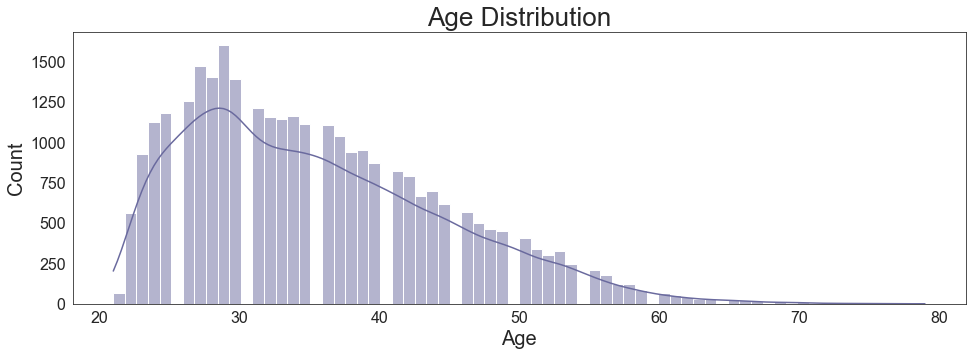

In [28]:
sns.set_style('white')
fig, ax1 = plt.subplots(figsize=(16,5))

sns.set_style('white')
sns.histplot(data=default_credit_card_2,
             x=default_credit_card_2.age,
             color ='#6a6a9e', kde = True,ax = ax1)

ax1.set_title("Age Distribution",fontsize = 26)
ax1.tick_params(labelsize=16)
ax1.set_ylabel("Count",fontsize=20)
ax1.set_xlabel("Age",fontsize=20)
plt.show()

***Age is definitely skewed! therefore, to better understand customer behavior based on age, it may be a good idea to create age groups based on percentiles. Lets do this***

In [39]:
# We will divide the ages in 10 groups based on percentiles

# Let's create a list to nominate ages ranges 
percentil_list = [round(np.percentile(default_credit_card_2.age, i ),2)
                  for i in range(0,105,5)]
range_labels = [str(int(i)) + '-'+ str(int(j)) 
                for i,j in zip(percentil_list[:-1],percentil_list[1:])]

# Ages ranges by percentil 
default_credit_card_2['age_range'] = pd.qcut(default_credit_card_2.age,20,range_labels )
# Looking the results
default_credit_card_2.loc[:,default_credit_card_2.columns[:5].tolist() + ['age_range']].sample(3)

,limit_bal,sex,education,marriage,age,age_range
12320,210000,1,1,1,40,38-40
27769,50000,2,5,2,23,21-23
24424,50000,1,1,1,47,46-49


In [41]:
# To visualize the data and understand if it really make sense to divede ages in age ranges, lets create two summaries:

# Summary basede on age range (groups)
summary_by_age_range = default_credit_card_2.groupby('age_range',as_index = False).default_payment_next_month.mean()
# Summary based on normal age
summary_by_age = default_credit_card_2.groupby('age',as_index = False).default_payment_next_month.mean()

print(f'summary_by_age_range shape: {summary_by_age_range.shape}'
      f'\nsummary_by_age shape: {summary_by_age.shape}')

summary_by_age_range shape: (20, 2)
summary_by_age shape: (56, 2)


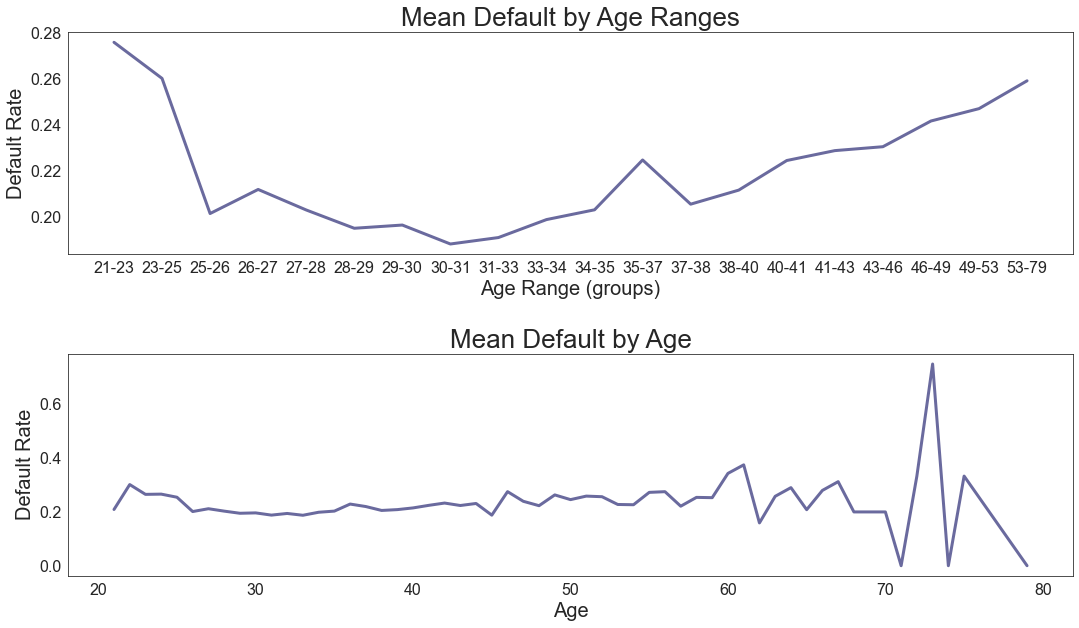

In [45]:
# Now, lets visualize the data


fig, (ax1,ax2) = plt.subplots(2,1,figsize=(18,10))

# Fig 1
sns.lineplot(y=summary_by_age_range.default_payment_next_month,
            x=summary_by_age_range.age_range,
            color ='#6a6a9e',lw =3, ax = ax1)

ax1.set_title("Mean Default by Age Ranges",fontsize = 26)
ax1.tick_params(labelsize=16)
ax1.set_ylabel("Default Rate",fontsize=20)
ax1.set_xlabel("Age Range (groups)",fontsize=20)

# Fig 2
sns.lineplot(y=summary_by_age.default_payment_next_month,
            x=summary_by_age.age,
            color ='#6a6a9e',lw =3, ax = ax2)

ax2.set_title("Mean Default by Age",fontsize = 26)
ax2.tick_params(labelsize=16)
ax2.set_ylabel("Default Rate",fontsize=20)
ax2.set_xlabel("Age",fontsize=20)
plt.subplots_adjust(hspace = 0.45)
plt.show()

***When using Age ranges, we can definitely identify a behavior. Young and old customers have a higher rate of default. But when we look at the summary by age, without ranges, it is very hard to find a pattern. this shows that our hypothesis was correct, it seems to be a good idea to use age ranges instead of ages***

## SEX

In [13]:
# To analyze the gender feature, lets start with the Default Rate

sex_df = default_credit_card_2.groupby('sex',as_index = False).agg({'default_payment_next_month':'mean'})
sex_df['Not Default'] = 1 - sex_df['default_payment_next_month']
sex_df['sex'] =['Male', 'Female']
sex_df.set_index('sex',inplace = True)
sex_df.rename(columns = {'default_payment_next_month':'Default'}, inplace = True)
sex_df

,Default,Not Default
sex,,
Male,0.241672,0.758328
Female,0.207763,0.792237


In [14]:
# Creating a percentage formatting to improve the graphic 

def percent_formatter(x, pos):
    """The two args are the value and tick position"""
    return f'{int(100*x)}%'

formatter = FuncFormatter(percent_formatter)

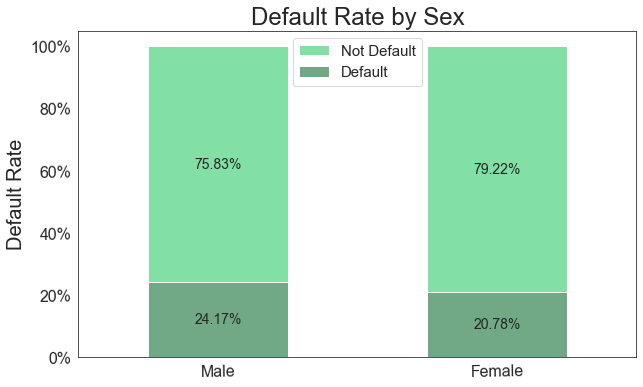

In [50]:
# Visualizing with a stacked bar plot

fig, ax1 = plt.subplots(figsize=(10,6))

sex_df.plot( kind='bar', stacked=True,color = ['#71a885','#82e0a5'], ax = ax1)
ax1.set_title("Default Rate by Sex",fontsize = 24)
ax1.tick_params(labelrotation = 1,labelsize=16)
ax1.set_ylabel("Default Rate",fontsize=20)
ax1.set_xlabel("")

# Adjusting Legend order and location
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0] 
plt.legend([handles[i] for i in order], [labels[i] for i in order],fontsize = 15,loc='upper center')

# Showing %values inside bars
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax1.text(x+width/2, y+height/2,
             f'{round(100*height,2)}%',
             fontsize =14, horizontalalignment='center',
             verticalalignment='center')
    
# Seting formatter    
ax1.yaxis.set_major_formatter(formatter)
plt.show()

***the difference is not huge, but it is there. This is a feature that is probably worth keeping***

## Education

In [46]:

print(f'EDUCATION Possible Values: {sorted(default_credit_card.EDUCATION.unique())}'
      f'\n{default_credit_card.EDUCATION.value_counts()}')


EDUCATION Possible Values: [0, 1, 2, 3, 4, 5, 6]
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


## Marriage

In [47]:

print(f'\n\nMARRIAGE Possible Values: {sorted(default_credit_card.MARRIAGE.unique())}'
      f'\n{default_credit_card.MARRIAGE.value_counts()}')



MARRIAGE Possible Values: [0, 1, 2, 3]
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
